# PHASE 1 - DIC PROJECT

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

## Data Preprocessing/Cleaning Steps:

### Step 1: Importing text data file and converting to Pandas DataFrame

In [2]:
input_text_file = 'data.txt'
data = []

with open(input_text_file, 'r') as f:
    header = f.readline().strip().split(',')
    for line in f:
        if not line.strip():
            continue
        val = line.strip().split(',')
        data.append(dict(zip(header, val)))
df = pd.DataFrame(data)
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215098286784,221.10430196573566,Premium,Mailed check,No,Both,No,Mobile,36.75810391025656,...,10,Sci-Fi,2.1764975145384615,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.1752084605118185,294.9868822491737,Basic,Credit card,Yes,Movies,No,Tablet,32.450567831131046,...,18,Action,3.478632294057515,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106656871383258,883.7859516109778,Basic,Mailed check,Yes,Movies,No,Computer,7.3951601087942,...,23,Fantasy,4.23882362326149,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263742940677236,232.43977410167156,Basic,Electronic check,No,TV Shows,No,Tablet,27.96038869388153,...,30,Drama,4.276012901811724,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953077584672634,966.3254223263401,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397365536275,...,20,Comedy,3.616170325945041,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902084074489,742.2724604737357,Basic,Mailed check,No,Movies,No,Computer,13.502729184365432,...,47,Sci-Fi,3.6974510232798927,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049256863986475,1526.7630530864176,Premium,Credit card,No,TV Shows,Yes,TV,24.963290507876522,...,35,Comedy,1.4497416092138868,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514568733543953,1640.1462668904667,Premium,Credit card,Yes,TV Shows,No,TV,10.628728463670228,...,44,Action,4.012217305706107,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555321725532,126.98388725207873,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782446294577,...,36,Fantasy,2.135788821770025,7,Female,5,No,Yes,63SJ44RT4A,0


### Step 2: Check and Remove Empty Rows

In [3]:
empty_rows = df[df.isnull().all(axis=1)]
#print(empty_rows)
df = df.dropna(how='all')

### Step 3: Check and Handle Missing Values

In [4]:
missing_values = df.isnull().sum()
#print(missing_values)
df = df.dropna()

### Step 4: Check and Remove Duplicates

In [5]:
duplicate_rows = df[df.duplicated()]
#print(duplicate_rows)
df = df.drop_duplicates()

### Step 5: Check Unique Values

In [6]:
unique_values = df.nunique()
print("Table variables and the number of their unique values:")
print(unique_values)

Table variables and the number of their unique values:
AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  243787
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  243787
Churn                            2
dtype: int64


### Step 6: Check Data Types

In [7]:
data_types = df.dtypes
print("Data Types of All columns :\n",data_types)

Data Types of All columns :
 AccountAge                  object
MonthlyCharges              object
TotalCharges                object
SubscriptionType            object
PaymentMethod               object
PaperlessBilling            object
ContentType                 object
MultiDeviceAccess           object
DeviceRegistered            object
ViewingHoursPerWeek         object
AverageViewingDuration      object
ContentDownloadsPerMonth    object
GenrePreference             object
UserRating                  object
SupportTicketsPerMonth      object
Gender                      object
WatchlistSize               object
ParentalControl             object
SubtitlesEnabled            object
CustomerID                  object
Churn                       object
dtype: object


### Step 7: Convert to correct data type 

In [8]:
cols_to_convert = ['MonthlyCharges','TotalCharges','ViewingHoursPerWeek','AverageViewingDuration','UserRating']
df[cols_to_convert] = df[cols_to_convert].astype(float)
print(df.dtypes)

AccountAge                   object
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth     object
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth       object
Gender                       object
WatchlistSize                object
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                        object
dtype: object


### Step 8: Set Proper Precision

In [9]:
df[cols_to_convert] = df[cols_to_convert].round(2)
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.06,221.10,Premium,Mailed check,No,Both,No,Mobile,36.76,...,10,Sci-Fi,2.18,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.18,294.99,Basic,Credit card,Yes,Movies,No,Tablet,32.45,...,18,Action,3.48,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.11,883.79,Basic,Mailed check,Yes,Movies,No,Computer,7.40,...,23,Fantasy,4.24,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.26,232.44,Basic,Electronic check,No,TV Shows,No,Tablet,27.96,...,30,Drama,4.28,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.95,966.33,Premium,Electronic check,Yes,TV Shows,No,TV,20.08,...,20,Comedy,3.62,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.64,742.27,Basic,Mailed check,No,Movies,No,Computer,13.50,...,47,Sci-Fi,3.70,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.05,1526.76,Premium,Credit card,No,TV Shows,Yes,TV,24.96,...,35,Comedy,1.45,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.51,1640.15,Premium,Credit card,Yes,TV Shows,No,TV,10.63,...,44,Action,4.01,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.14,126.98,Premium,Bank transfer,Yes,TV Shows,No,TV,30.47,...,36,Fantasy,2.14,7,Female,5,No,Yes,63SJ44RT4A,0


### Step 9: Label Encoding

In [10]:
label_encoder = LabelEncoder()
cols_to_encode = ['SubscriptionType', 'PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered','GenrePreference', 'Gender','ParentalControl','SubtitlesEnabled']
for column in cols_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df.head() 

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.06,221.10,1,3,0,0,0,1,36.76,...,10,4,2.18,4,1,3,0,0,CB6SXPNVZA,0
1,57,5.18,294.99,0,1,1,1,0,3,32.45,...,18,0,3.48,8,1,23,0,1,S7R2G87O09,0
2,73,12.11,883.79,0,3,1,1,0,0,7.40,...,23,3,4.24,6,1,1,1,1,EASDC20BDT,0
3,32,7.26,232.44,0,2,0,2,0,3,27.96,...,30,2,4.28,2,1,24,1,1,NPF69NT69N,0
4,57,16.95,966.33,1,2,1,2,0,2,20.08,...,20,1,3.62,4,0,0,0,0,4LGYPK7VOL,0


### Step 10: Check and Remove Outliers 

In [11]:
df_copy = df.copy()
df_copy = df_copy.drop('CustomerID',axis=1)
df_copy = df_copy.apply(pd.to_numeric, errors='coerce')
outliers = pd.DataFrame()
for column in df_copy.columns:
    q1 = df_copy[column].quantile(0.25)
    q3 = df_copy[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]
    outliers = pd.concat([outliers, column_outliers], axis=0)
outliers
index_lst = outliers.index.tolist()
removed_outliers_df_before = df.copy()
removed_outliers_df_after = removed_outliers_df_before.drop(index_lst)
print(removed_outliers_df_after.shape)

(198952, 21)


### Step 11: Scaling Data

In [12]:
df_copy2 = df.copy()
df_copy2 = df_copy2.drop('CustomerID',axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy2)
scaled_df = pd.DataFrame(scaled_data, columns=df_copy2.columns)
scaled_df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,-1.169131,-0.330596,-1.012558,-0.004365,1.342684,-0.999291,-1.220435,-0.998840,-0.446005,1.445945,-0.568933,-1.005712,1.418671,-0.712138,-0.175519,1.000299,-1.253786,-1.001572,-1.002353,-0.470475
1,-0.089945,-1.689315,-0.871297,-1.227447,-0.448191,1.000710,0.002971,-0.998840,1.340527,1.062620,-1.317372,-0.450971,-1.413971,0.413142,1.216976,1.000299,1.526687,-1.001572,0.997652,-0.470475
2,0.376731,-0.087967,0.254361,-1.227447,1.342684,1.000710,0.002971,-0.998840,-1.339270,-1.165288,-0.691099,-0.104258,0.710510,1.070998,0.520728,1.000299,-1.531833,0.998430,0.997652,-0.470475
3,-0.819125,-1.208680,-0.990879,-1.227447,0.447247,-0.999291,1.226377,-0.998840,1.340527,0.663287,0.777662,0.381141,0.002350,1.105622,-0.871766,1.000299,1.665711,0.998430,0.997652,-0.470475
4,-0.089945,1.030434,0.412159,-0.004365,0.447247,1.000710,1.226377,-0.998840,0.447261,-0.037548,-0.928699,-0.312285,-0.705810,0.534326,-0.175519,-0.999701,-1.670857,-1.001572,-1.002353,-0.470475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0.493400,-0.658722,-0.016195,-1.227447,1.342684,-0.999291,0.002971,-0.998840,-1.339270,-0.622763,-0.235502,1.559965,1.418671,0.603574,-1.219890,1.000299,-0.558668,0.998430,-1.002353,-0.470475
243783,1.660088,0.129243,1.483579,-0.004365,-0.448191,-0.999291,1.226377,1.001162,0.447261,0.396471,-0.642391,0.727854,-0.705810,-1.344026,-0.175519,1.000299,1.109616,-1.001572,-1.002353,-0.470475
243784,1.543419,0.466612,1.700356,-0.004365,-0.448191,1.000710,1.226377,-0.998840,0.447261,-0.878017,1.661731,1.351938,-1.413971,0.871910,0.520728,1.000299,0.136451,0.998430,0.997652,-0.470475
243785,-1.548305,1.305413,-1.192495,-0.004365,-1.343628,1.000710,1.226377,-0.998840,0.447261,0.886522,1.210292,0.797197,0.710510,-0.746762,0.868852,-0.999701,-0.975739,-1.001572,0.997652,-0.470475


## EDA Steps:

### Step 1: Overview of the Data

In [13]:
overview_data = df.info()
overview_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  object 
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  int64  
 4   PaymentMethod             243787 non-null  int64  
 5   PaperlessBilling          243787 non-null  int64  
 6   ContentType               243787 non-null  int64  
 7   MultiDeviceAccess         243787 non-null  int64  
 8   DeviceRegistered          243787 non-null  int64  
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  object 
 12  GenrePreference           243787 non-null  int64  
 13  UserRating                243787 non-null  f

### Step 2: Statistical Summary of the Data

In [14]:
summary_data = df.describe()
summary_data

,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,GenrePreference,UserRating,Gender,ParentalControl,SubtitlesEnabled
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.00000,243787.000000,243787.000000,243787.000000
mean,12.490687,750.741017,1.003569,1.500527,0.499645,0.997572,0.499420,1.499297,20.502183,92.264052,1.996682,3.00271,0.499850,0.500786,0.501175
std,4.327613,523.073274,0.817608,1.116775,0.500001,0.817392,0.500001,1.119490,11.243755,50.505245,1.412112,1.15527,0.500001,0.500000,0.500000
min,4.990000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,8.740000,329.150000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.760000,48.380000,1.000000,2.00000,0.000000,0.000000,0.000000
50%,12.500000,649.880000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,20.520000,92.250000,2.000000,3.00000,0.000000,1.000000,1.000000
75%,16.240000,1089.320000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,30.220000,135.910000,3.000000,4.00000,1.000000,1.000000,1.000000
max,19.990000,2378.720000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,40.000000,180.000000,4.000000,5.00000,1.000000,1.000000,1.000000


### Step 3: Feature Analysis using Correlation matrix

In [15]:
from tabulate import tabulate
df_copy3 = df.copy()
df_copy3 = df_copy3.drop('CustomerID',axis=1)
columns_to_convert = ['AccountAge', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth','WatchlistSize','Churn']  # Replace with your column names
new_dtype = 'float64'
df_copy3[columns_to_convert] = df_copy3[columns_to_convert].astype(new_dtype)
target_variable = 'Churn'
correlation_matrix = df_copy3.corrwith(df_copy3[target_variable])
corr_df = pd.DataFrame(correlation_matrix, columns=['Correlation'])
print("Correlation Matrix:")
print(corr_df)


Correlation Matrix:
                          Correlation
AccountAge                  -0.197736
MonthlyCharges               0.100475
TotalCharges                -0.120529
SubscriptionType            -0.012850
PaymentMethod                0.018896
PaperlessBilling            -0.000923
ContentType                 -0.011760
MultiDeviceAccess           -0.001285
DeviceRegistered            -0.000266
ViewingHoursPerWeek         -0.128645
AverageViewingDuration      -0.146896
ContentDownloadsPerMonth    -0.129752
GenrePreference              0.012560
UserRating                   0.022122
SupportTicketsPerMonth       0.084064
Gender                       0.007467
WatchlistSize                0.021739
ParentalControl             -0.005531
SubtitlesEnabled            -0.012372
Churn                        1.000000


### Step 4: Multivariate Graphical Analysis using Heatmap

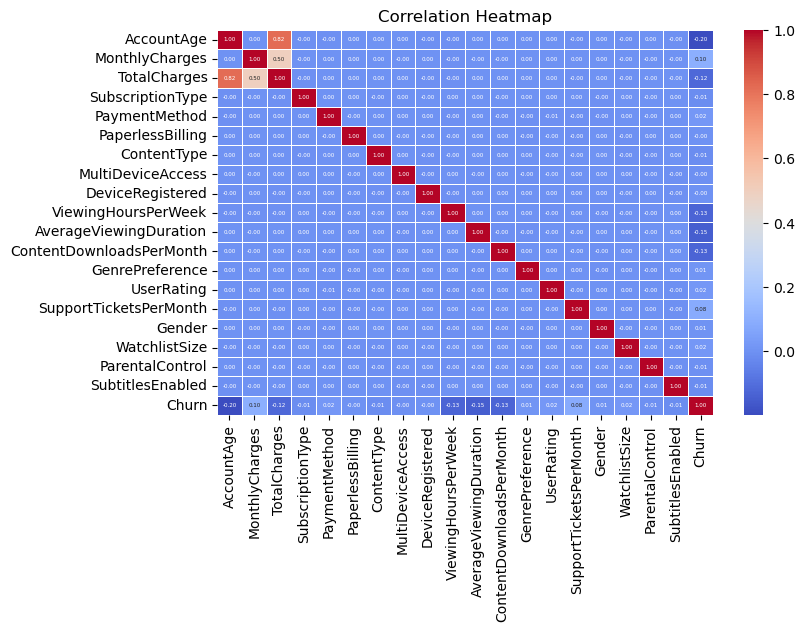

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_copy3.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,annot_kws={"size":4})
plt.title('Correlation Heatmap')
plt.show()

### Step 5: Feature Engineering using Recursive Feature Elimination (RFE)

In [17]:
X = df.drop(columns=['Churn','CustomerID'])
y = df['Churn']
estimator = DecisionTreeClassifier()
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_].tolist()
print("Selected features:")
print(selected_features)

Selected features:
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


### Step 6: Univariate Graphical Analysis using Histogram

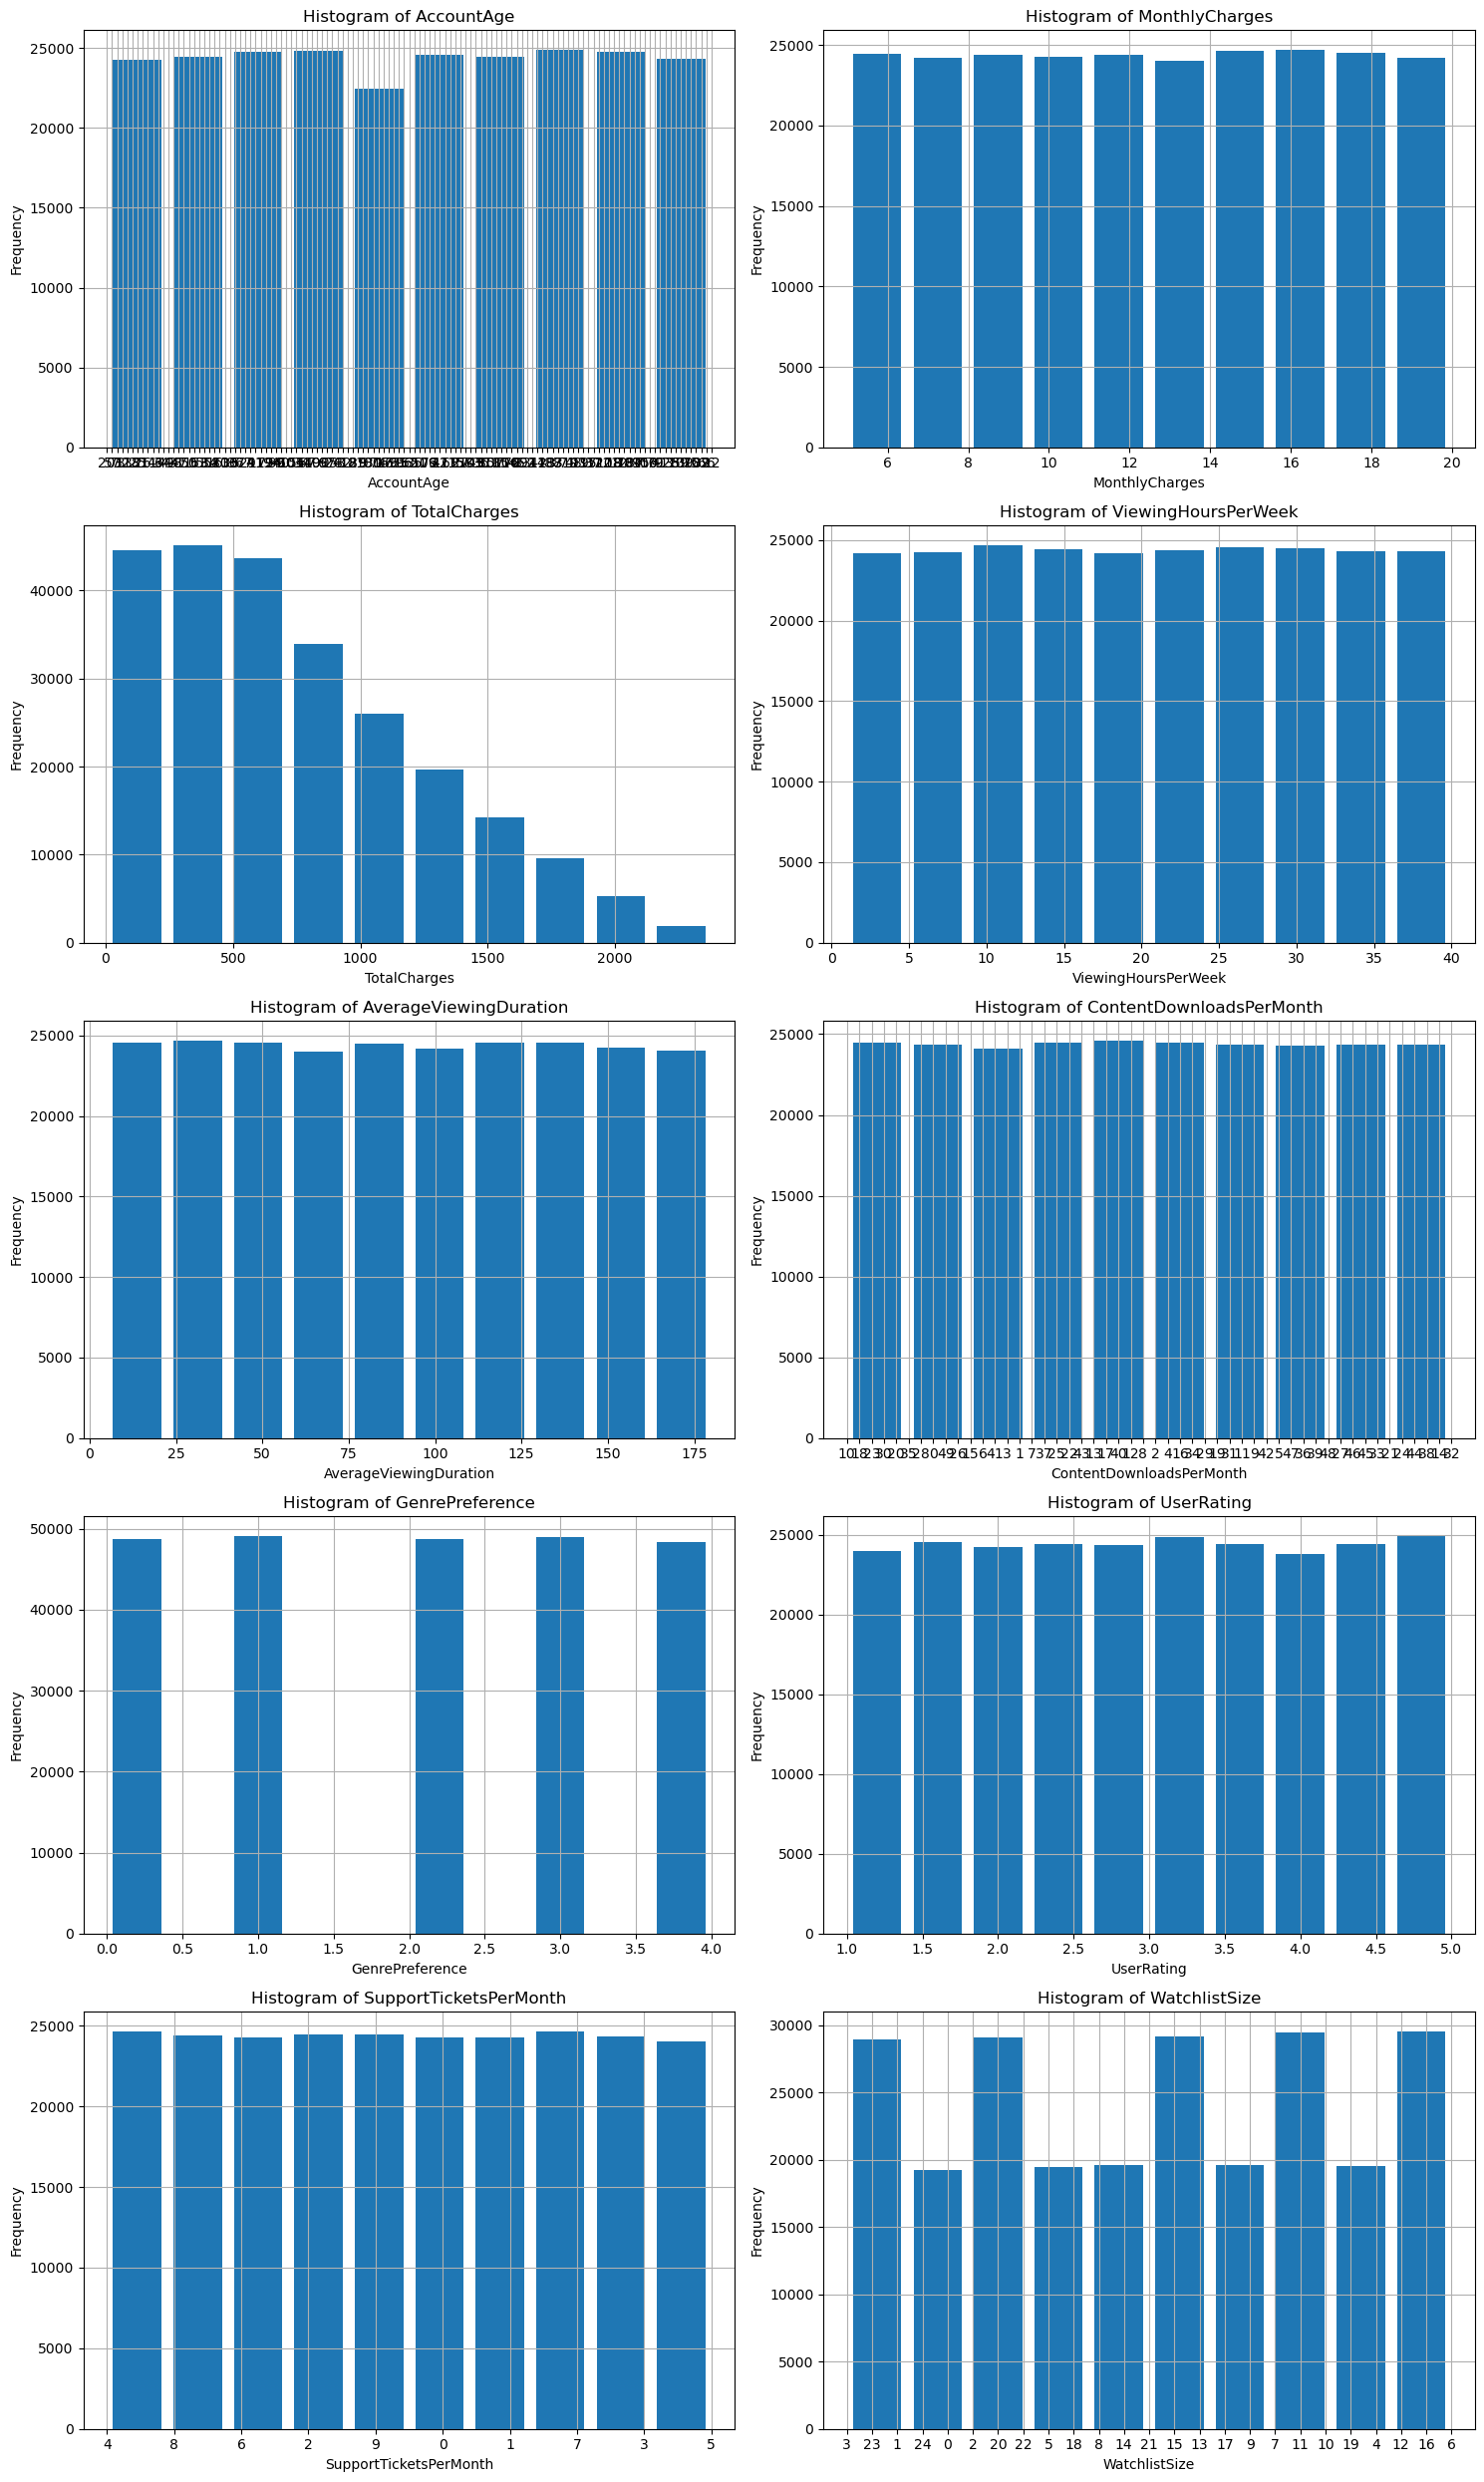

In [18]:
num_features = len(selected_features)
num_cols = min(num_features, 2)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = np.array([axes])
    
# Plot histograms for each column
for i, col in enumerate(selected_features):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].hist(df[col], bins=10,rwidth=0.8)
    axes[row_index, col_index].set_title(f'Histogram of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].grid(True)

plt.tight_layout()
plt.show()

### Step 7: Bivariate Graphical Analysis using Histogram with Frequency Curves

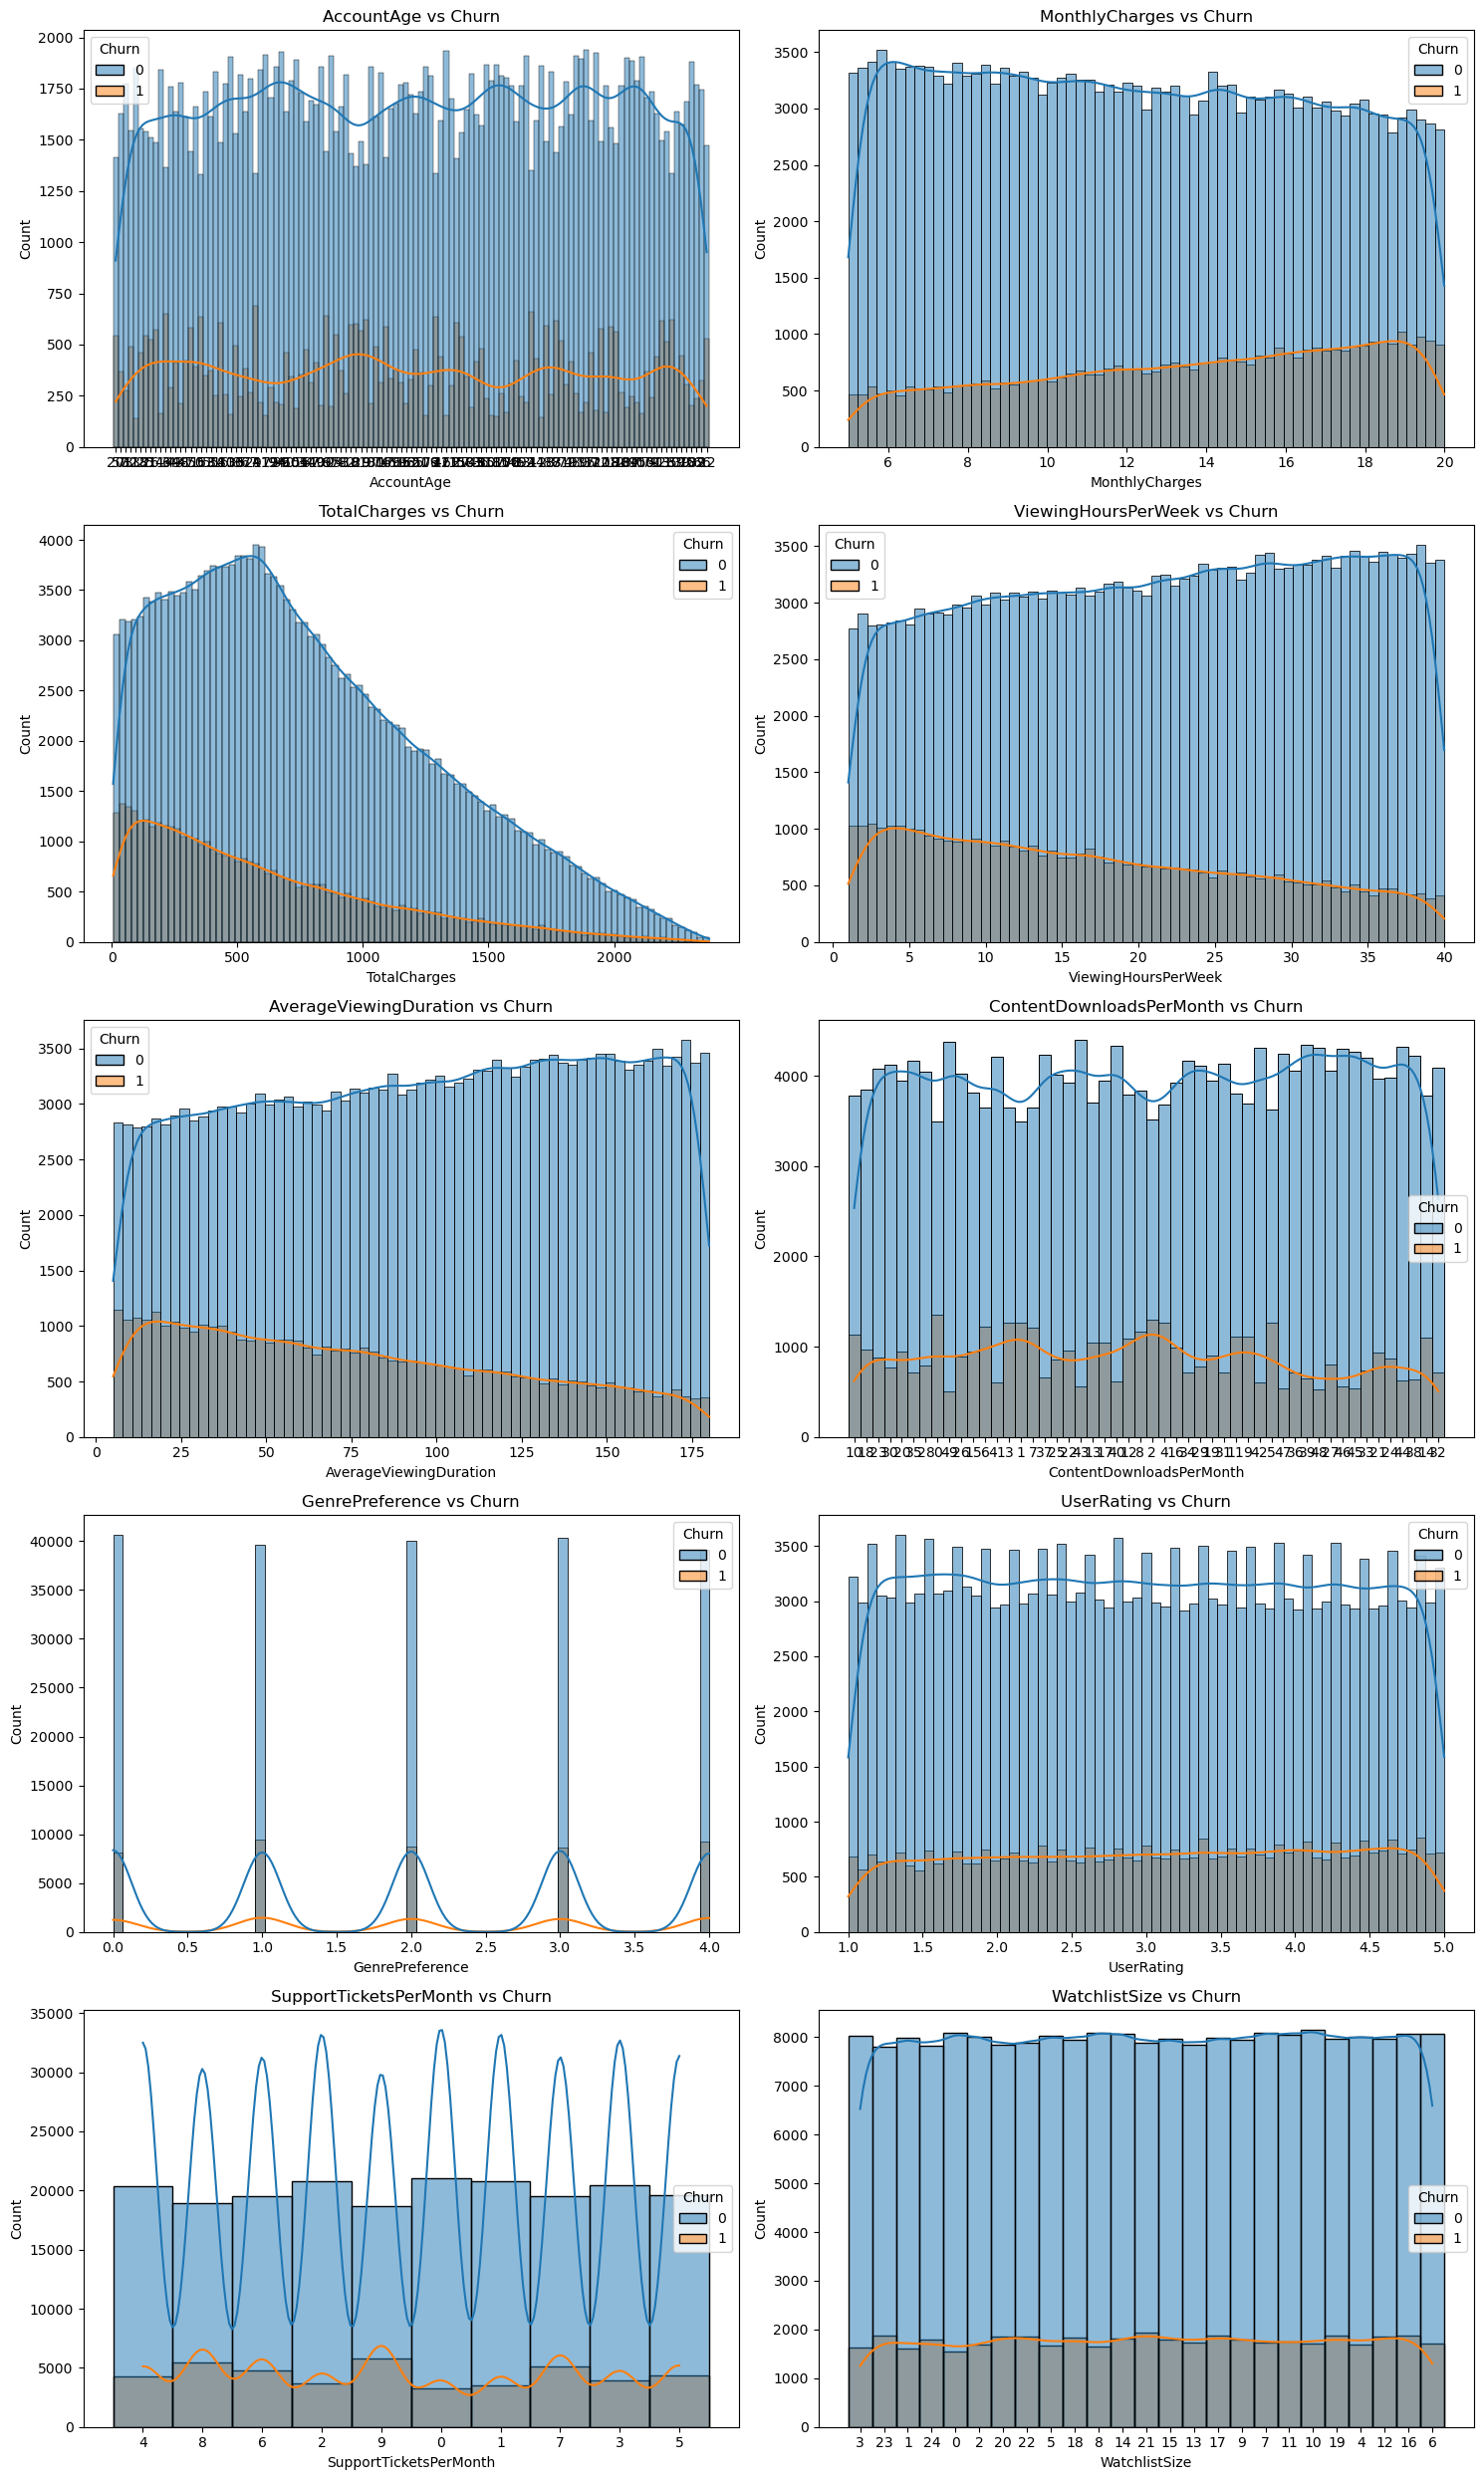

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(selected_features)

num_rows = num_features // 2 if num_features % 2 == 0 else num_features // 2 + 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows > 1:
    axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(selected_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[i]
    sns.histplot(data=df, x=feature, hue='Churn', ax=ax, kde=True)
    ax.set_title(f'{feature} vs Churn')

if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Step 8: Pie Chart Analysis


Feature Importance (%):
                     Feature  Importance  Importance (%)
0                 AccountAge    0.093341        9.334110
1             MonthlyCharges    0.104177       10.417734
2               TotalCharges    0.085830        8.582952
3           SubscriptionType    0.020304        2.030423
4              PaymentMethod    0.025377        2.537688
5           PaperlessBilling    0.010333        1.033348
6                ContentType    0.020406        2.040580
7          MultiDeviceAccess    0.011512        1.151220
8           DeviceRegistered    0.025700        2.569983
9        ViewingHoursPerWeek    0.122519       12.251937
10    AverageViewingDuration    0.127929       12.792853
11  ContentDownloadsPerMonth    0.081910        8.191034
12           GenrePreference    0.032432        3.243246
13                UserRating    0.097284        9.728405
14    SupportTicketsPerMonth    0.042298        4.229752
15                    Gender    0.009760        0.976034
16    

(-1.0999998607736514,
 1.0999994811541158,
 -1.0999999999984413,
 1.0999999999694672)

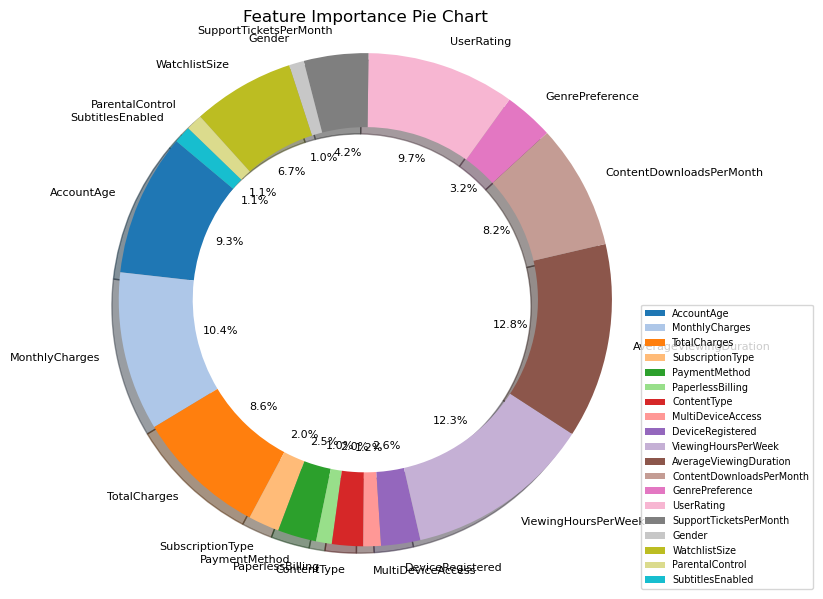

In [20]:
estimator.fit(X, y)
feature_importances = estimator.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df['Importance (%)'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100
print("\nFeature Importance (%):")
print(feature_importance_df)

colors = plt.cm.tab20.colors[:len(feature_importance_df)]

plt.figure(figsize=(7, 7))
plt.pie(feature_importance_df['Importance (%)'], labels=feature_importance_df['Feature'], autopct='%1.1f%%', startangle=140,
        colors=colors, shadow=True, wedgeprops=dict(width=0.3), textprops={'fontsize': 8})

plt.title('Feature Importance Pie Chart')
plt.legend(loc="best", fontsize='x-small', bbox_to_anchor=(1, 0.5))
plt.axis('equal')  


### Step 9: Understanding Churn Behaviour based on Average Viewing Duration

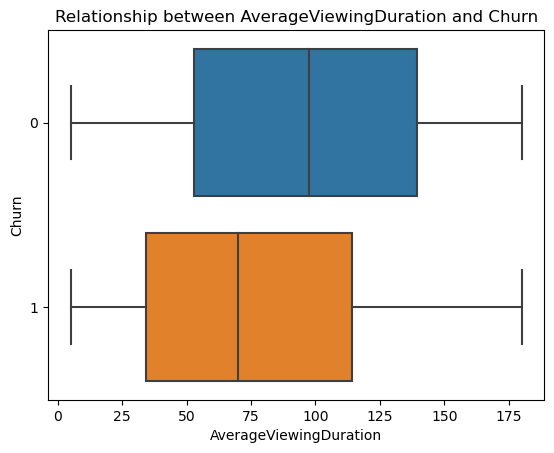

In [21]:
sns.boxplot(x='AverageViewingDuration', y='Churn', data=df)
plt.title('Relationship between AverageViewingDuration and Churn')
plt.xlabel('AverageViewingDuration')
plt.ylabel('Churn')
plt.show()

### Step 10: Target Variable Distribution Analysis

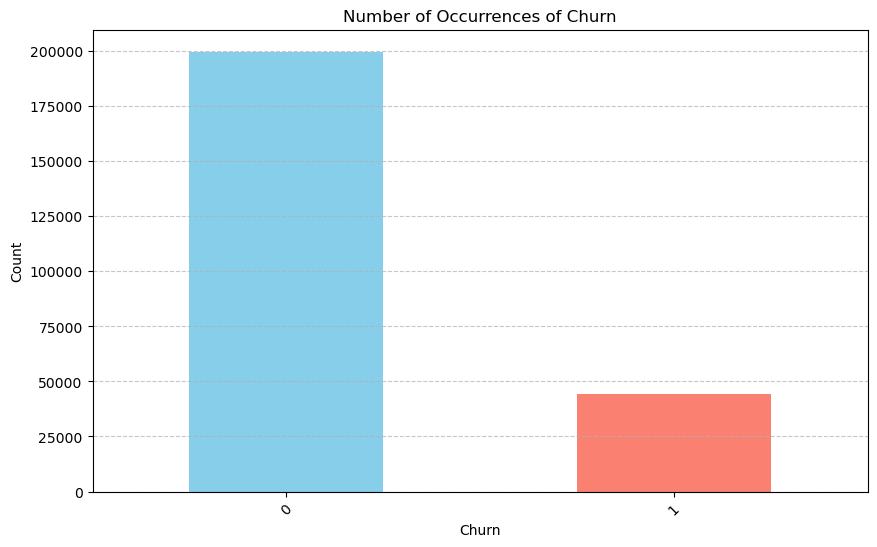

In [22]:
import matplotlib.pyplot as plt

# Calculating the number of occurrences
value_counts = df['Churn'].value_counts()

colors = ['skyblue', 'salmon']

# Plot the number of occurrences
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Number of Occurrences of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()